# Dataset

In [4]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Baca file CSV
df = pd.read_csv('SuperStoreOrders.csv', encoding='cp1252')
# Lihat beberapa kolom awal
print(df.columns)

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')


In [5]:
df.head(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [6]:
df['sales'] = df['sales'].str.replace(',', '', regex=False).astype(float)

In [7]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

# One-Way ANOVA

In [8]:
# One-Way ANOVA
model_1way = ols('sales ~ C(order_priority)', data=df).fit()
anova_1way = sm.stats.anova_lm(model_1way, typ=2)
# Tampilkan dengan format notasi ilmiah (sci)
pd.options.display.float_format = '{:.6e}'.format
print("One-Way ANOVA:\n", anova_1way)

One-Way ANOVA:
                         sum_sq           df            F       PR(>F)
C(order_priority) 4.710560e+05 3.000000e+00 6.605014e-01 5.762584e-01
Residual          1.219204e+10 5.128600e+04          NaN          NaN


### P-value > a, mmenerima H0. Terdapat perbedaan yg tidak signifikan terhapa kolom order_priority terhadap kolom sales

In [9]:
# One-Way ANOVA
model_1way = ols('sales ~ C(sub_category)', data=df).fit()
anova_1way = sm.stats.anova_lm(model_1way, typ=2)
# Tampilkan dengan format notasi ilmiah (sci)
pd.options.display.float_format = '{:.6e}'.format
print("One-Way ANOVA:\n", anova_1way)

One-Way ANOVA:
                       sum_sq           df            F       PR(>F)
C(sub_category) 2.583494e+09 1.600000e+01 8.615832e+02 0.000000e+00
Residual        9.609017e+09 5.127300e+04          NaN          NaN


### P-value < a, tolak H0. Terdapat perbedaan yg signifikan terhapa kolom sub_category terhadap kolom sales

C:\Users\71486\AppData\Local\Temp\ipykernel_48352\1442403597.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='order_priority', y='sales', data=df, palette="Set2")
C:\Users\71486\AppData\Local\Temp\ipykernel_48352\1442403597.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sub_category', y='sales', data=df, palette="Set3")


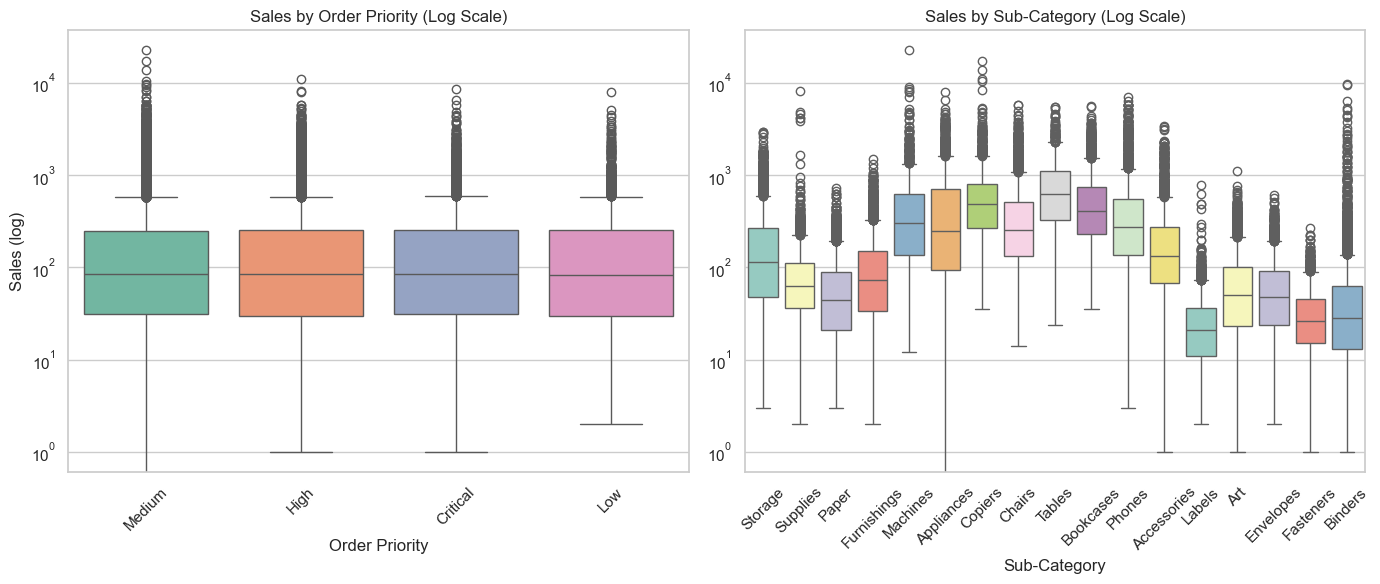

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Style dan ukuran
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# ===== Boxplot 1: Sales vs Order Priority (log scale) =====
plt.subplot(1, 2, 1)
sns.boxplot(x='order_priority', y='sales', data=df, palette="Set2")
plt.yscale("log")
plt.title("Sales by Order Priority (Log Scale)")
plt.xlabel("Order Priority")
plt.ylabel("Sales (log)")
plt.xticks(rotation=45)

# ===== Boxplot 2: Sales vs Sub-Category (log scale) =====
plt.subplot(1, 2, 2)
sns.boxplot(x='sub_category', y='sales', data=df, palette="Set3")
plt.yscale("log")
plt.title("Sales by Sub-Category (Log Scale)")
plt.xlabel("Sub-Category")
plt.ylabel("")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Two-Way ANOVA

In [ ]:
# Two-Way ANOVA tanpa interaksi
model_2way = ols('sales ~ C(sub_category) * C(region)', data=df).fit()
anova_2way = sm.stats.anova_lm(model_2way, typ=2)
print("Two-Way ANOVA:\n",anova_2way)

Two-Way ANOVA:
                                 sum_sq           df            F        PR(>F)
C(sub_category)           2.540239e+09 1.600000e+01 8.970765e+02  0.000000e+00
C(region)                 1.130401e+08 1.200000e+01 5.322627e+01 3.865614e-128
C(sub_category):C(region) 4.577648e+08 1.920000e+02 1.347150e+01  0.000000e+00
Residual                  9.038212e+09 5.106900e+04          NaN           NaN


### p-value < a, tolak H0. Terdapat perbedaan yang signifikan antara sub_cateogery di region yang berbeda terhadap kolom sales

C:\Users\71486\AppData\Local\Temp\ipykernel_48352\955529136.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


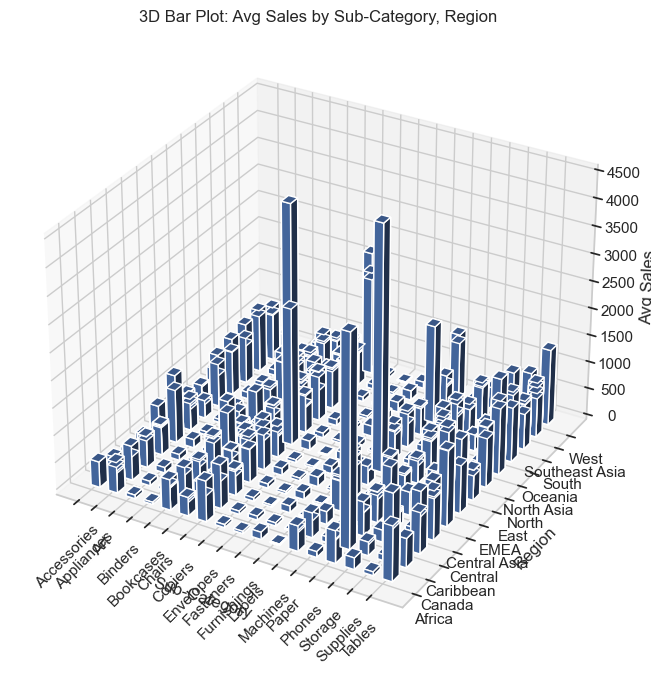

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Agregasi nilai rata-rata sales berdasarkan 3 faktor
grouped = df.groupby(['sub_category', 'region', 'order_priority'])['sales'].mean().reset_index()

# Konversi kategori menjadi angka untuk sumbu X, Y, Z
grouped['sub_cat_code'] = grouped['sub_category'].astype('category').cat.codes
grouped['region_code'] = grouped['region'].astype('category').cat.codes
grouped['priority_code'] = grouped['order_priority'].astype('category').cat.codes

# Buat 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x = grouped['sub_cat_code']
y = grouped['region_code']
z = np.zeros(len(grouped))
dx = dy = 0.5
dz = grouped['sales']

# Buat bar
ax.bar3d(x, y, z, dx, dy, dz, shade=True)

# Label sumbu
ax.set_xlabel('Sub-Category')
ax.set_ylabel('Region')
ax.set_zlabel('Avg Sales')

# Ticks label manual
ax.set_xticks(grouped['sub_cat_code'].unique())
ax.set_xticklabels(grouped['sub_category'].unique(), rotation=45)

ax.set_yticks(grouped['region_code'].unique())
ax.set_yticklabels(grouped['region'].unique())

plt.title('3D Bar Plot: Avg Sales by Sub-Category, Region')
plt.tight_layout()
plt.show()


## N-Way ANOVA

In [15]:
# Model: N-Way ANOVA dengan 3 faktor + interaksi
model_nway = ols('sales ~ C(sub_category) * C(region) * C(order_priority)', data=df).fit()
anova_nway = sm.stats.anova_lm(model_nway, typ=2)

# Tampilkan hasil dengan format scientific
pd.options.display.float_format = '{:.6e}'.format
print("N-Way ANOVA (3 faktor):\n", anova_nway)

c:\Users\71486\Test_MT\myvenv\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 192, but rank is 170
  warnings.warn('covariance of constraints does not have full '
c:\Users\71486\Test_MT\myvenv\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 48, but rank is 30
  warnings.warn('covariance of constraints does not have full '
c:\Users\71486\Test_MT\myvenv\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 36, but rank is 18
  warnings.warn('covariance of constraints does not have full '


N-Way ANOVA (3 faktor):
                                                   sum_sq           df  \
C(sub_category)                             4.079938e+09 1.600000e+01   
C(region)                                   4.767375e+07 1.200000e+01   
C(order_priority)                           7.562165e+04 3.000000e+00   
C(sub_category):C(region)                   4.179954e+08 1.920000e+02   
C(sub_category):C(order_priority)           6.610605e+06 4.800000e+01   
C(region):C(order_priority)                 1.037826e+07 3.600000e+01   
C(sub_category):C(region):C(order_priority) 1.588394e+08 5.760000e+02   
Residual                                    8.883007e+09 5.042900e+04   

                                                       F        PR(>F)  
C(sub_category)                             1.447618e+03  0.000000e+00  
C(region)                                   2.255373e+01  9.330296e-51  
C(order_priority)                           1.431019e-01  9.341238e-01  
C(sub_category):C(region)

c:\Users\71486\Test_MT\myvenv\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 576, but rank is 558
  warnings.warn('covariance of constraints does not have full '


## P-value < a, tolak H0. Terdapat perbedaan yg signifikan antara kolom sub_category dengan kolom sales
## P-value < a, tolak H0. Terdapat perbedaan yg signifikan antara kolom sub_category dengan kolom sales tergantung region-nya
## P-value < a, tolak H0. Terdapat perbedaan yg signifikan antara kolom sub_category dengan kolom sales tergantung region-nya dan order_prioritynya
## P-value > a, menerima H0. Terdapat perbedaan yg tidak signifikan antara kolom-kolom dengan sales


C:\Users\71486\AppData\Local\Temp\ipykernel_48352\1963178097.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


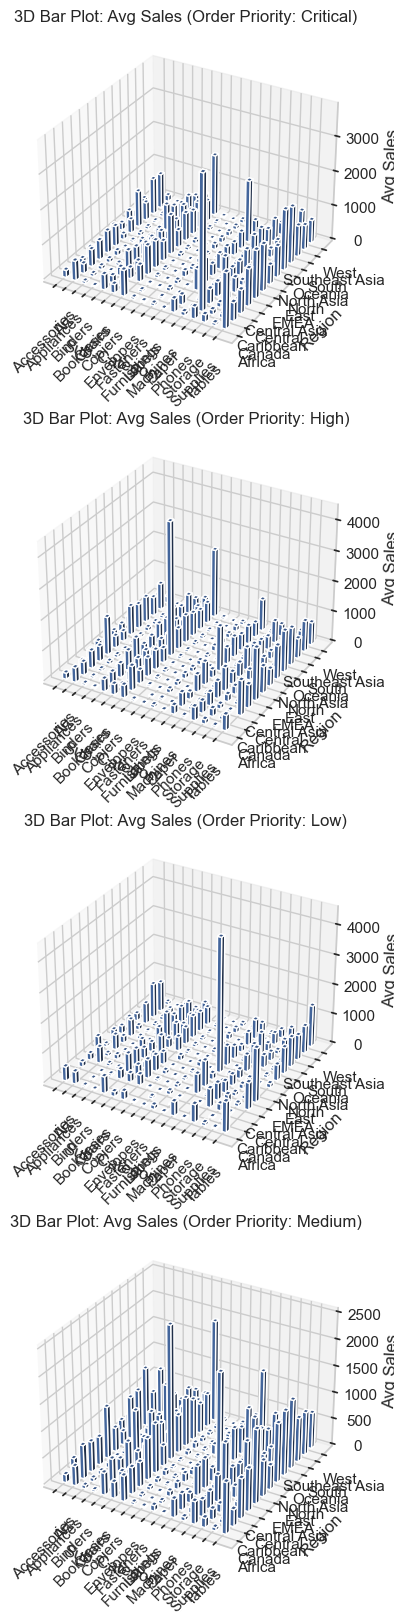

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Hitung rata-rata sales untuk kombinasi 3 faktor
grouped = df.groupby(['sub_category', 'region', 'order_priority'])['sales'].mean().reset_index()

# Konversi kategori menjadi kode numerik untuk visualisasi
grouped['sub_cat_code'] = grouped['sub_category'].astype('category').cat.codes
grouped['region_code'] = grouped['region'].astype('category').cat.codes

# Ambil mapping label
subcat_labels = grouped[['sub_category', 'sub_cat_code']].drop_duplicates().sort_values('sub_cat_code')
region_labels = grouped[['region', 'region_code']].drop_duplicates().sort_values('region_code')

# Buat plot per order_priority
order_priorities = grouped['order_priority'].unique()
fig = plt.figure(figsize=(15, 5 * len(order_priorities)))

for i, priority in enumerate(order_priorities):
    ax = fig.add_subplot(len(order_priorities), 1, i+1, projection='3d')
    
    subset = grouped[grouped['order_priority'] == priority]
    x = subset['sub_cat_code']
    y = subset['region_code']
    z = np.zeros(len(subset))
    dx = dy = 0.4
    dz = subset['sales']
    
    ax.bar3d(x, y, z, dx, dy, dz, shade=True)
    
    ax.set_title(f"3D Bar Plot: Avg Sales (Order Priority: {priority})")
    ax.set_xlabel('Sub-Category')
    ax.set_ylabel('Region')
    ax.set_zlabel('Avg Sales')
    
    ax.set_xticks(subcat_labels['sub_cat_code'])
    ax.set_xticklabels(subcat_labels['sub_category'], rotation=45)
    
    ax.set_yticks(region_labels['region_code'])
    ax.set_yticklabels(region_labels['region'])

plt.tight_layout()
plt.show()
